<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Praktikum_Mandiri/Praktikum9_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
 # Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [3]:
# Memuat dataset cancer
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum9_Mandiri/data/data.csv')

In [4]:
#  Menampilkan 5 data yang paling atas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Menampilkan 5 data yang paling bawah
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
# Menampilkan informasi detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Mencari data yang hilang
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
# Menghapus kolom 'id' dan 'Unnamed: 32'
df_clean = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Mengecek kembali kolom yang telah dihapus masih ada atau tidak
df_clean.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


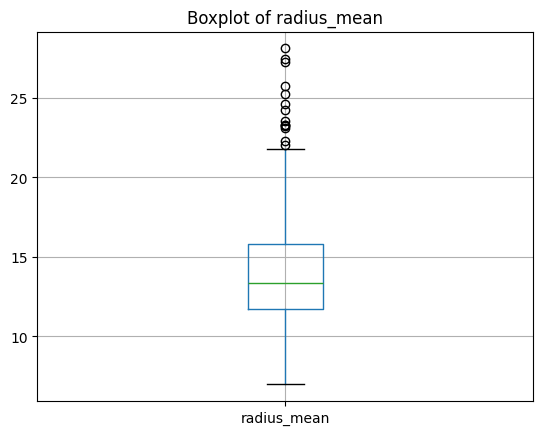

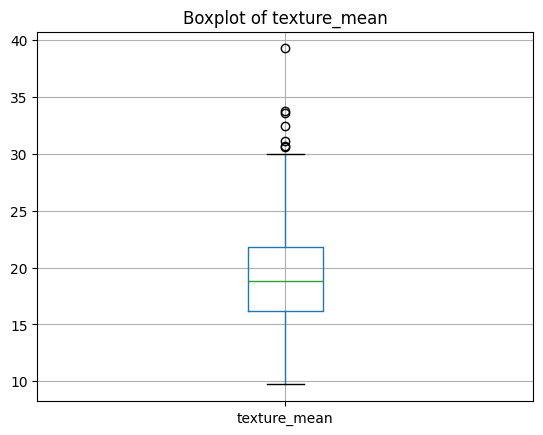

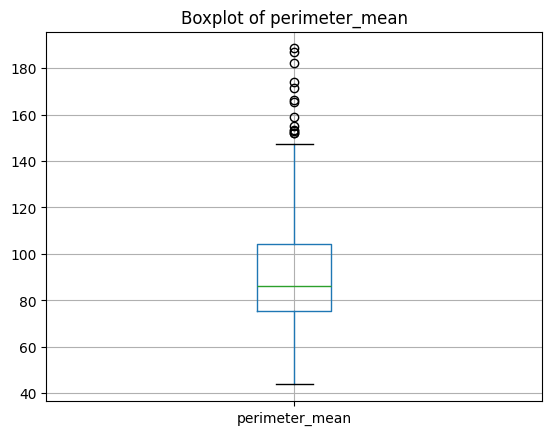

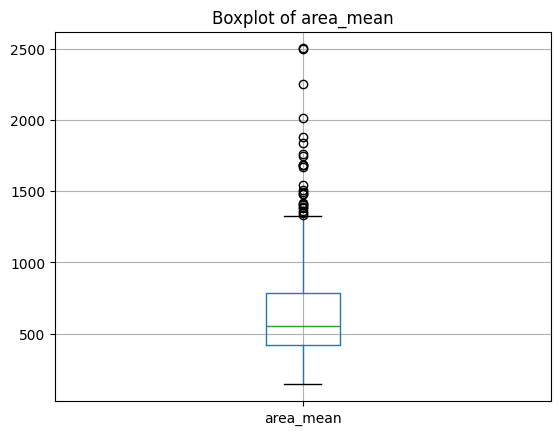

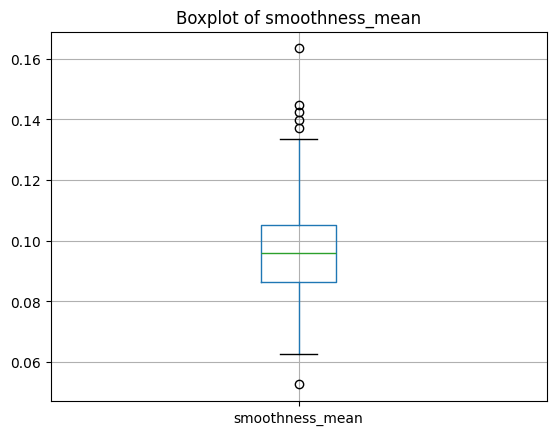

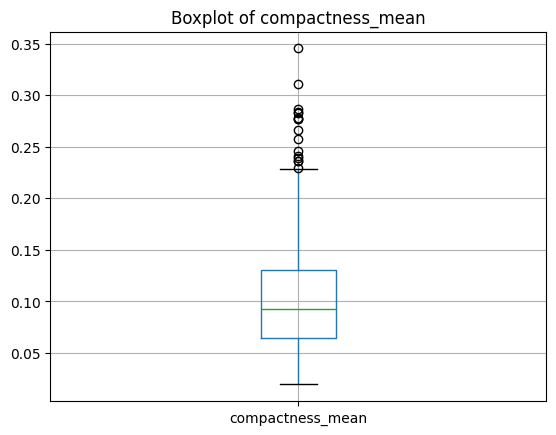

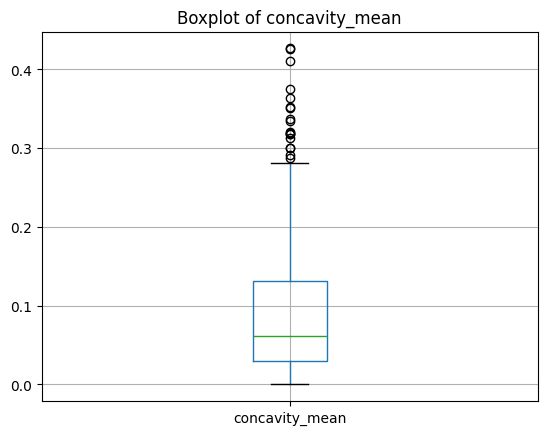

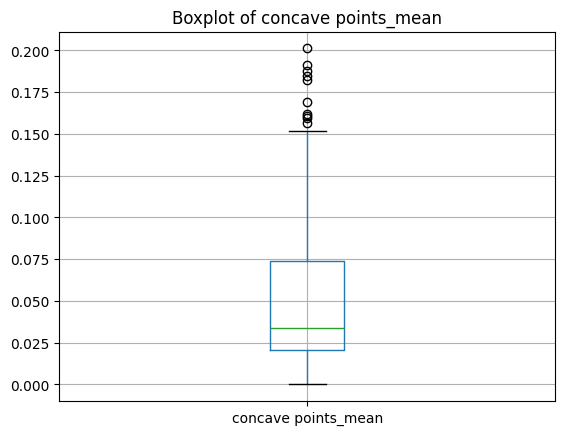

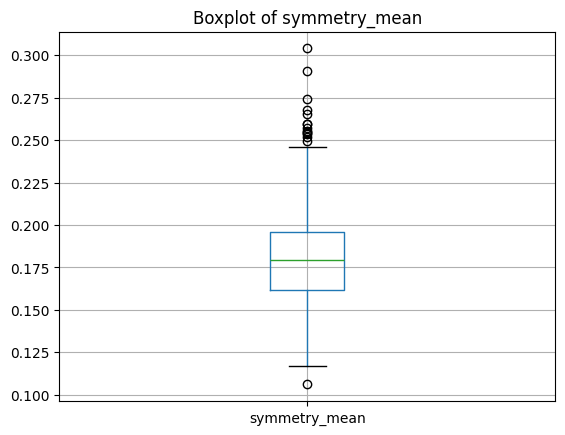

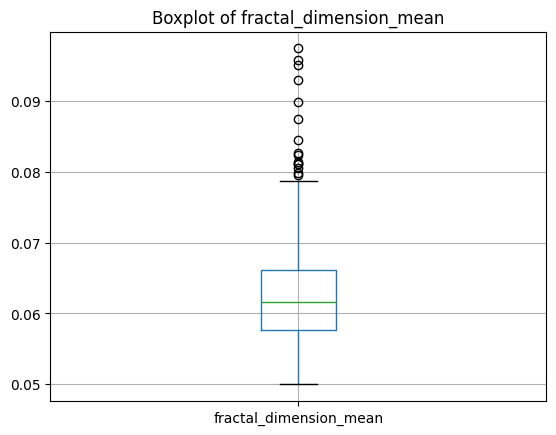

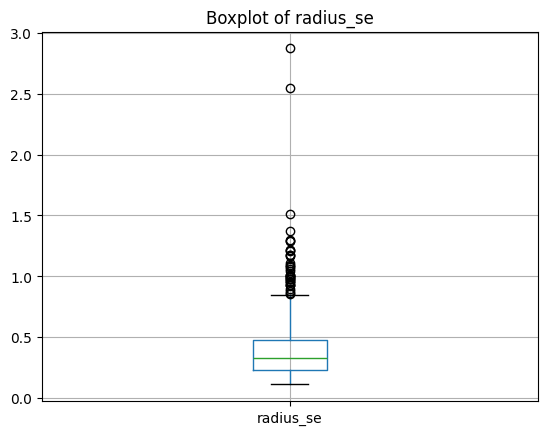

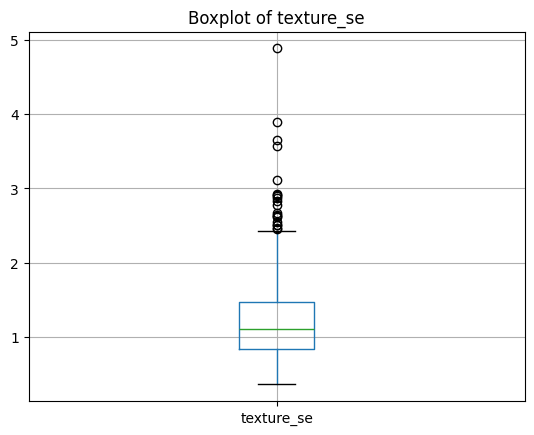

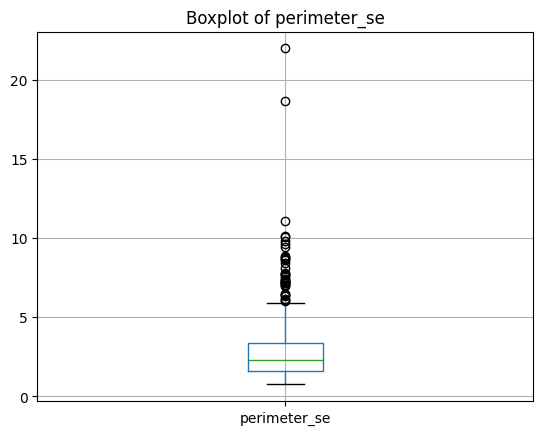

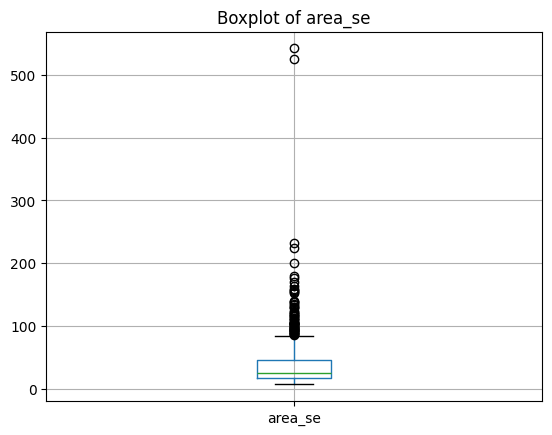

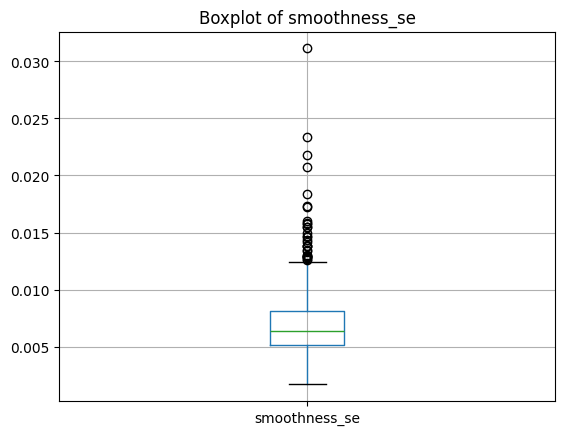

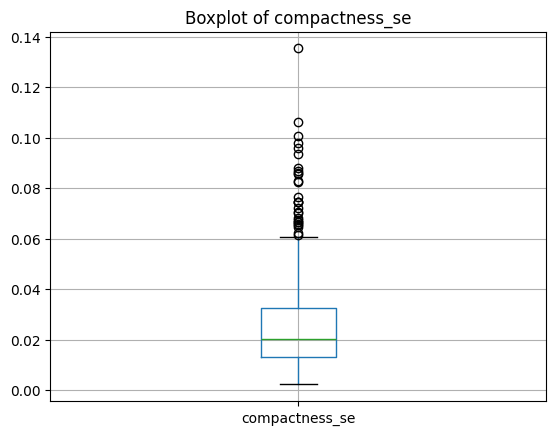

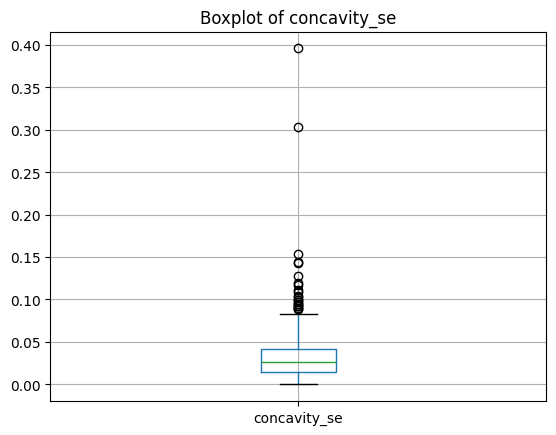

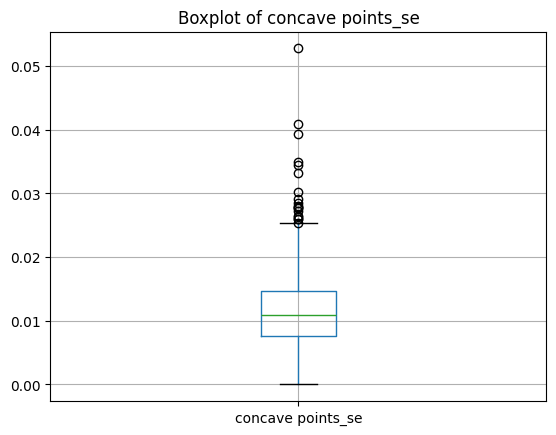

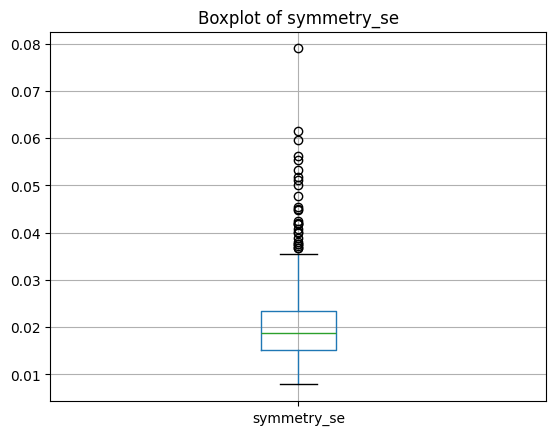

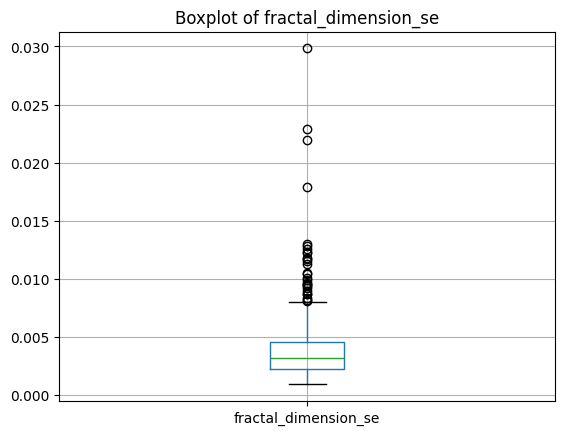

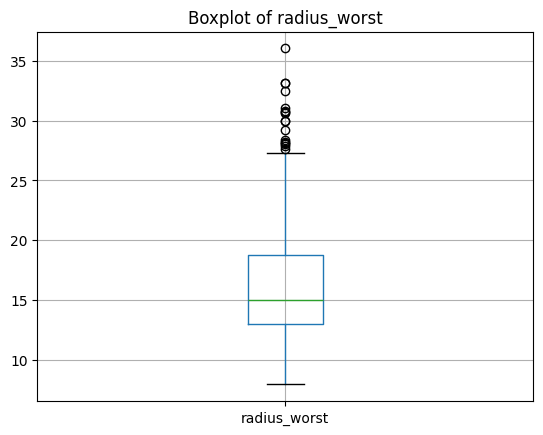

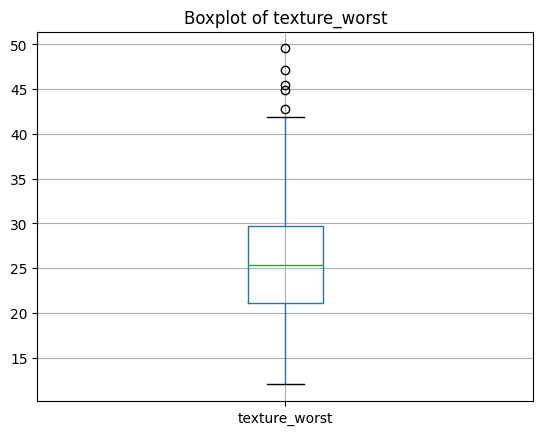

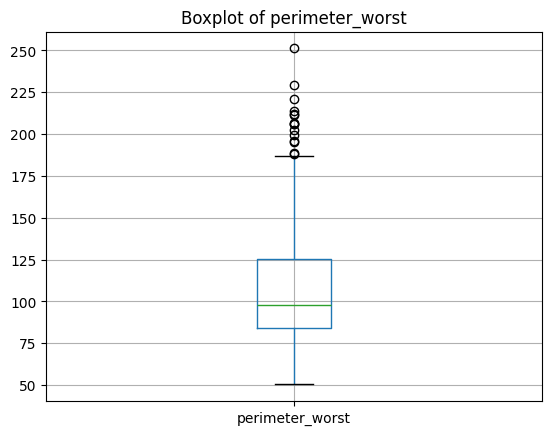

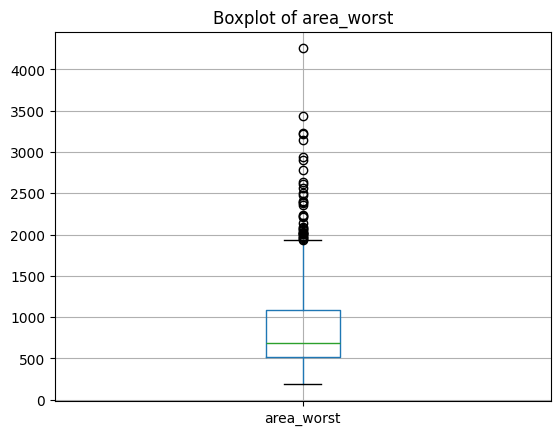

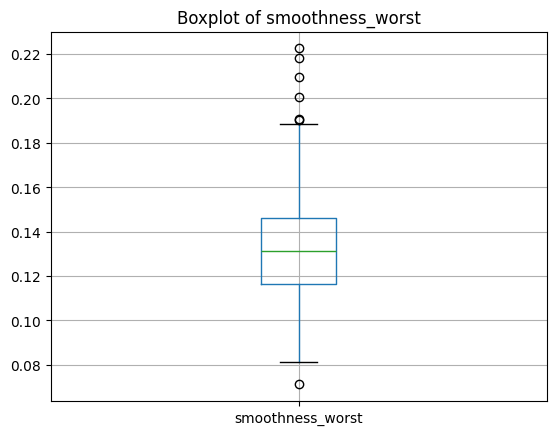

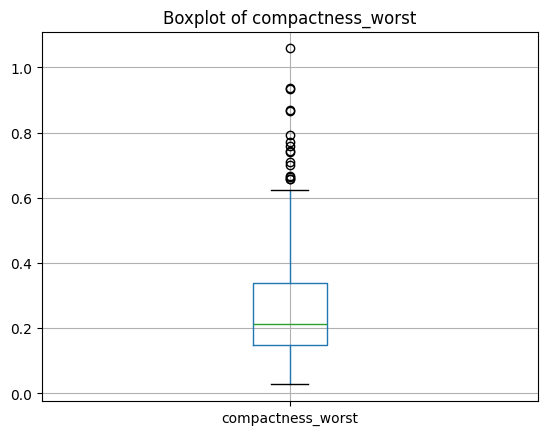

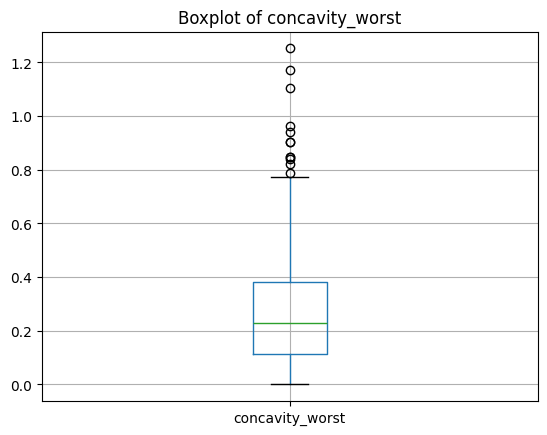

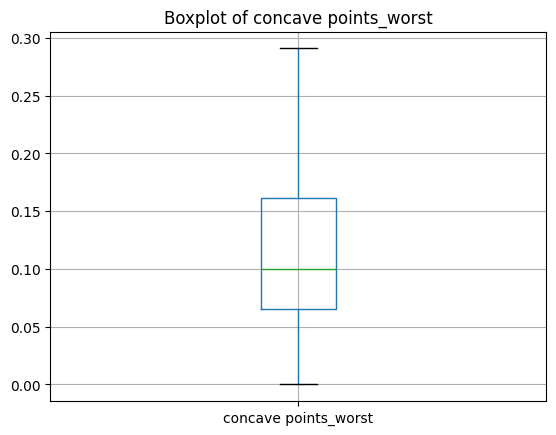

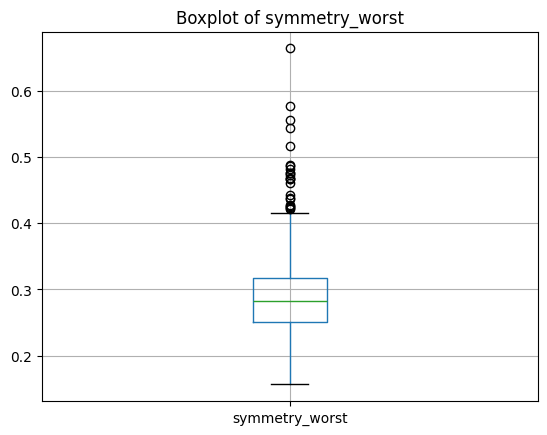

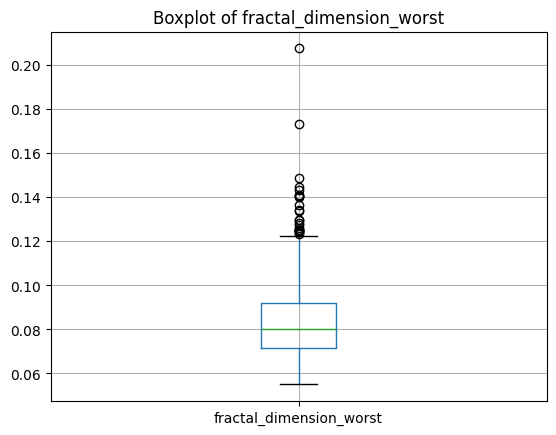

In [10]:
# Untuk mencari outliers
for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean.boxplot(column=[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode kolom diagnosis
le = LabelEncoder()
df_clean['diagnosis'] = le.fit_transform(df['diagnosis'])

print(df_clean['diagnosis'].value_counts())
print(f"Encoded classes: {list(le.classes_)}")

diagnosis
0    357
1    212
Name: count, dtype: int64
Encoded classes: ['B', 'M']


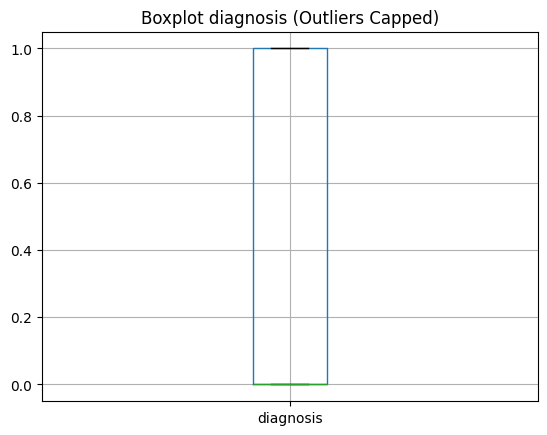

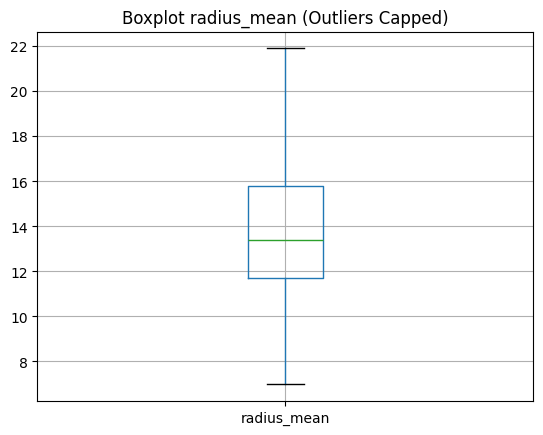

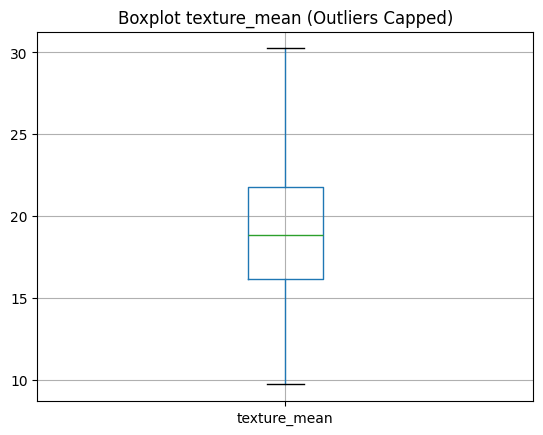

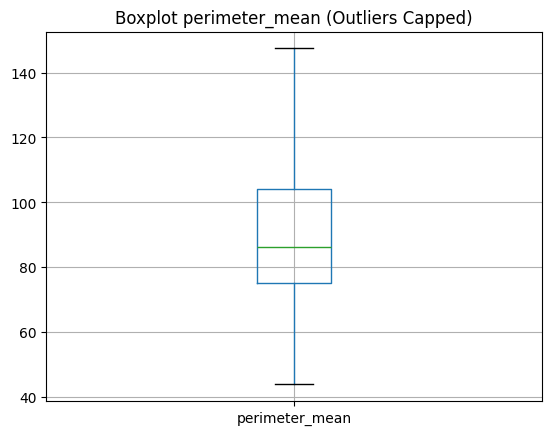

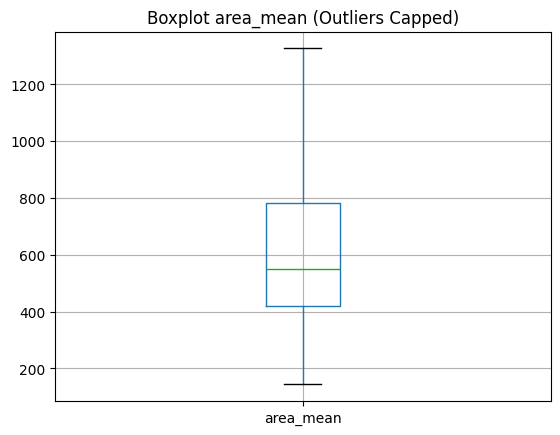

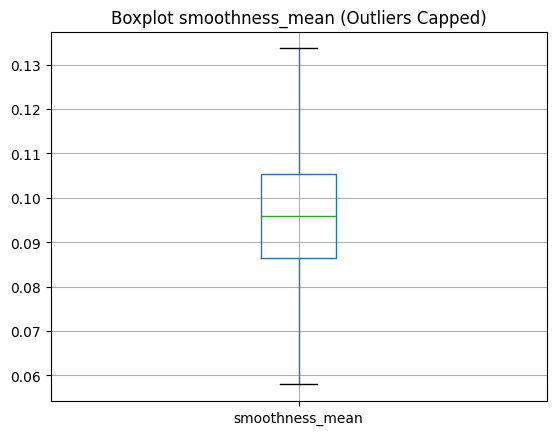

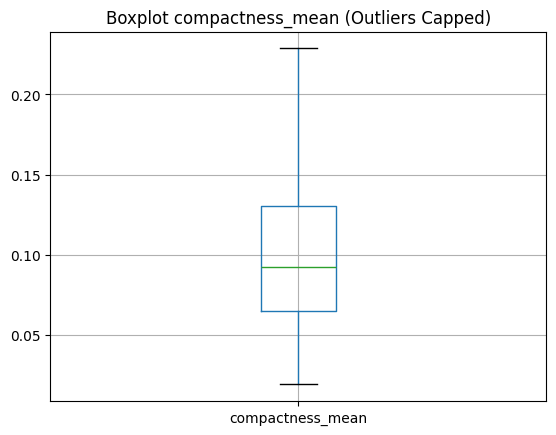

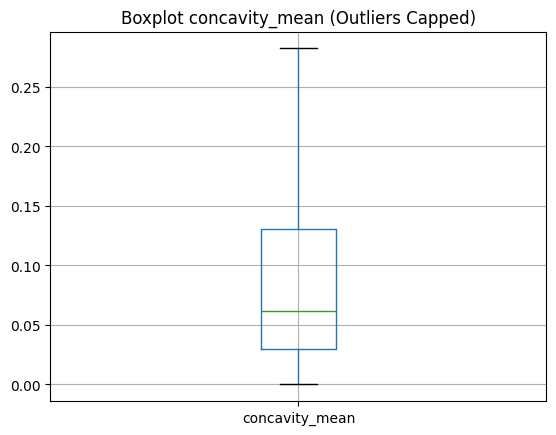

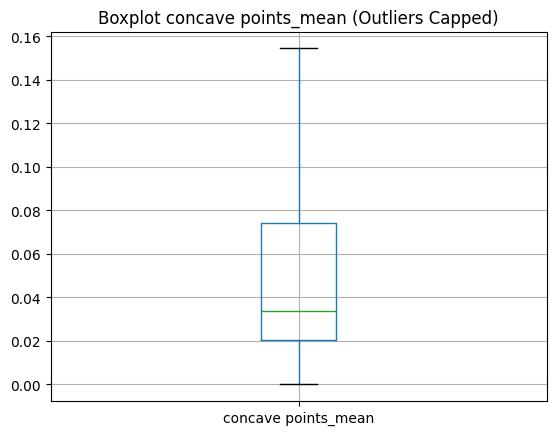

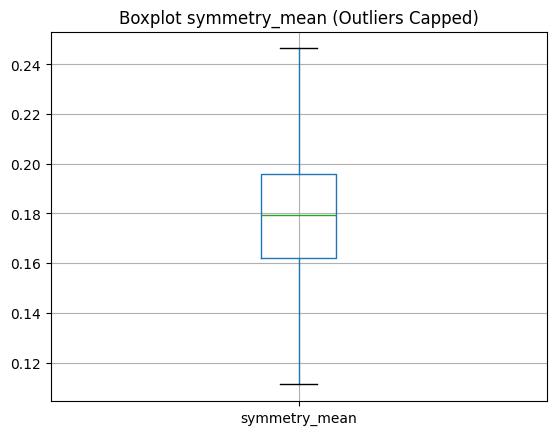

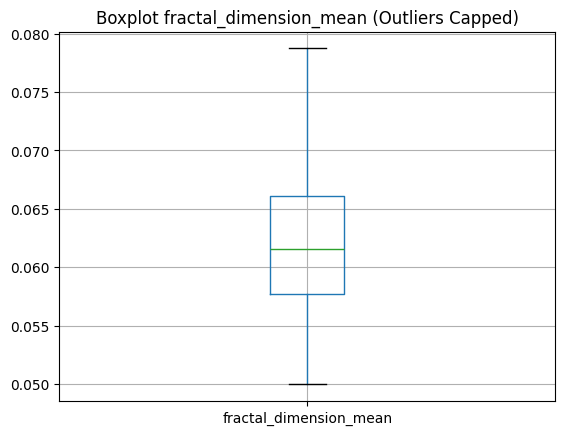

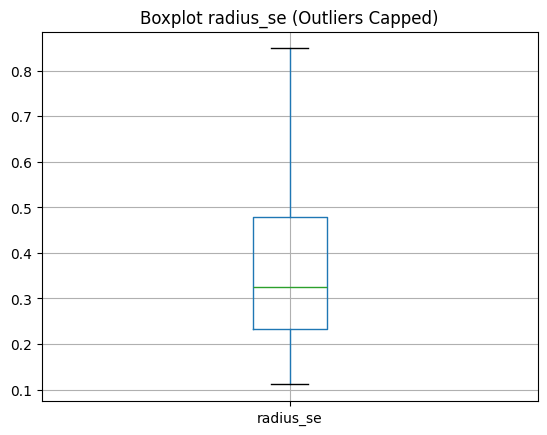

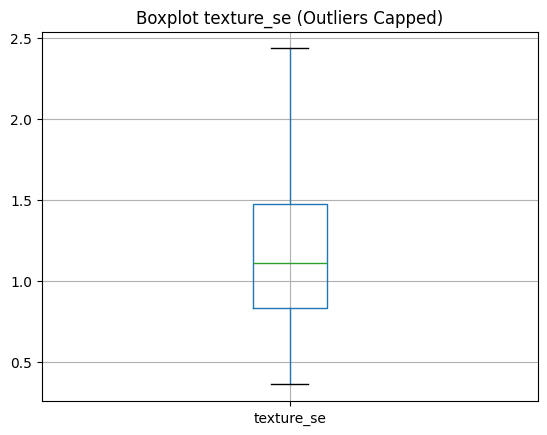

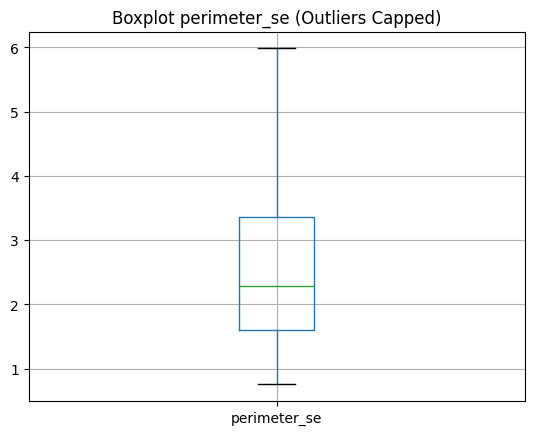

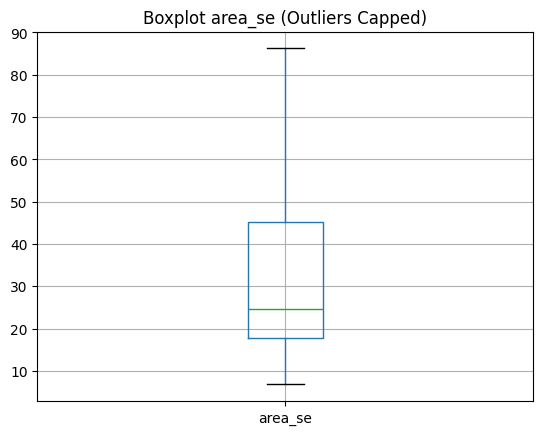

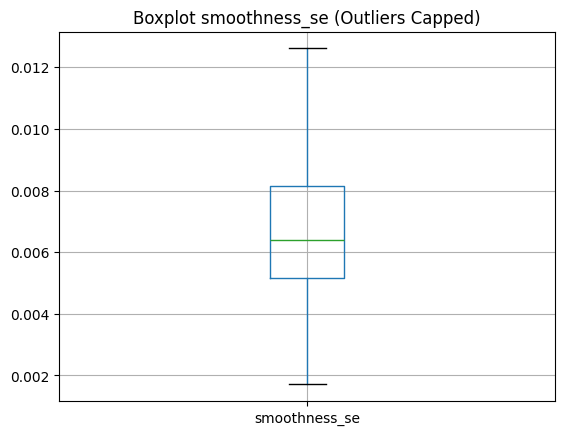

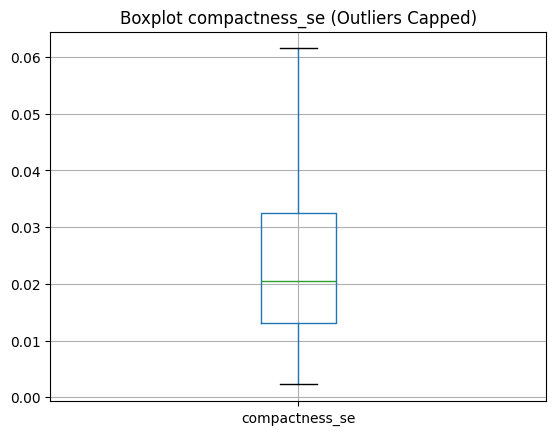

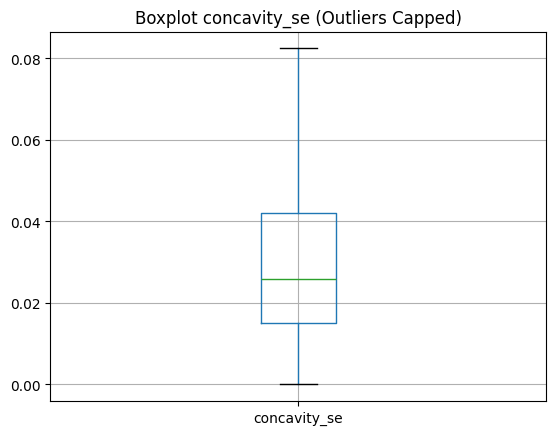

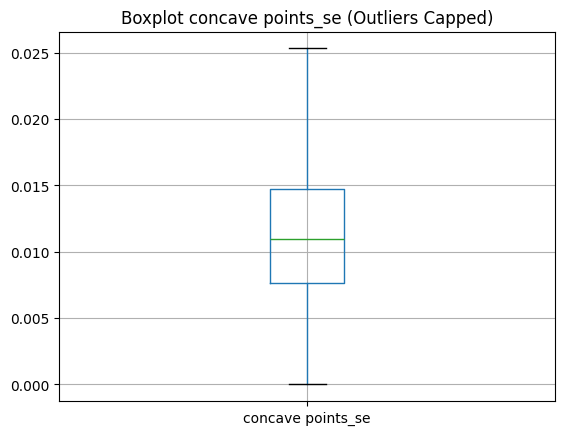

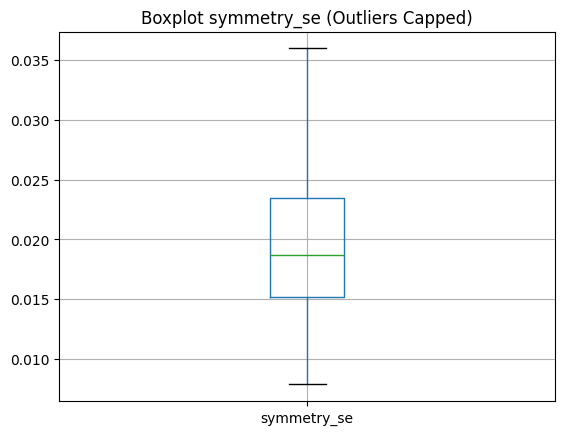

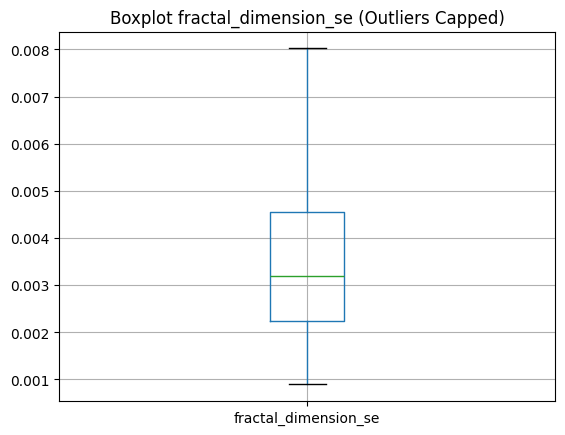

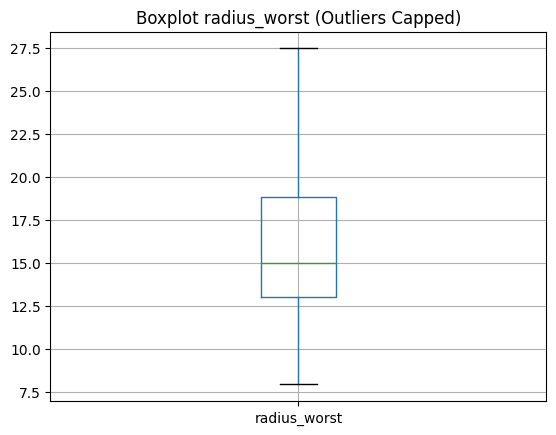

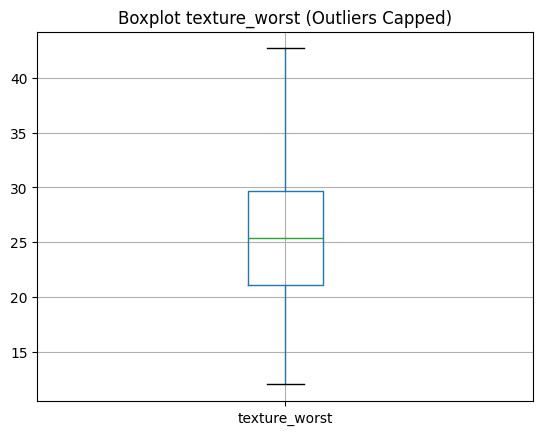

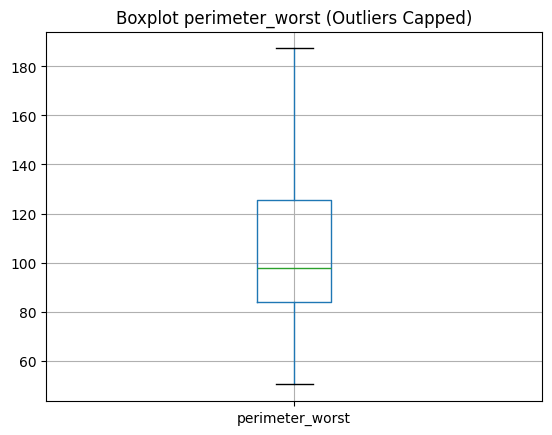

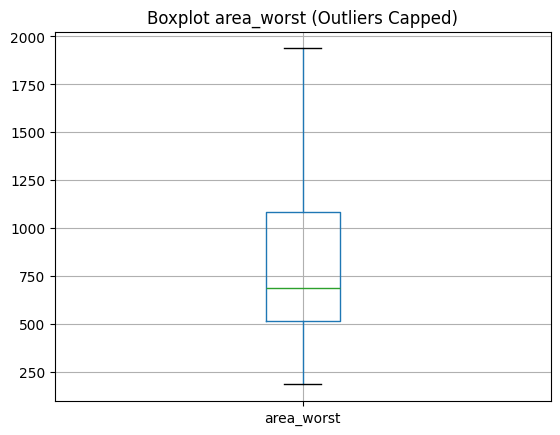

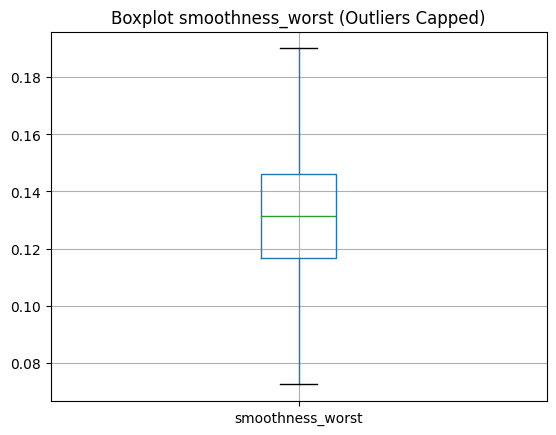

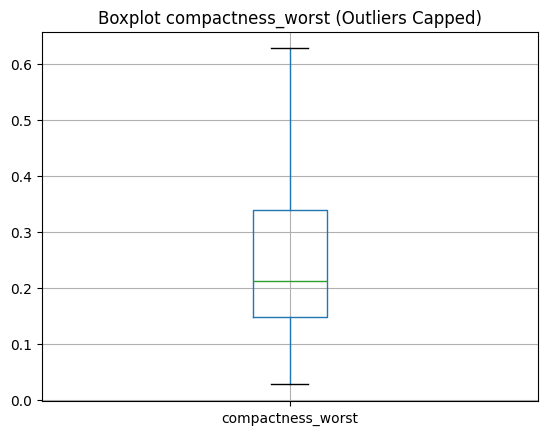

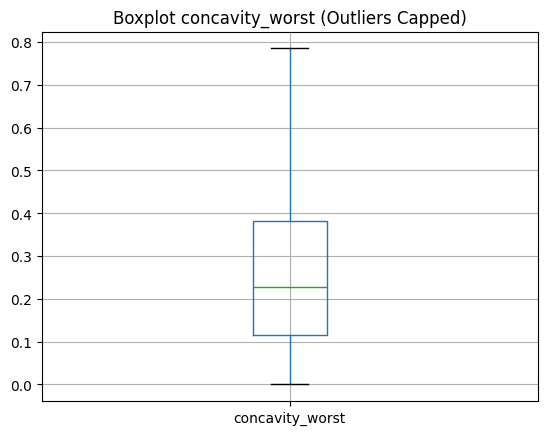

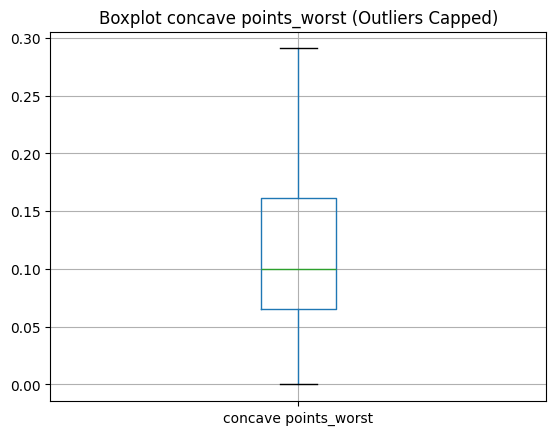

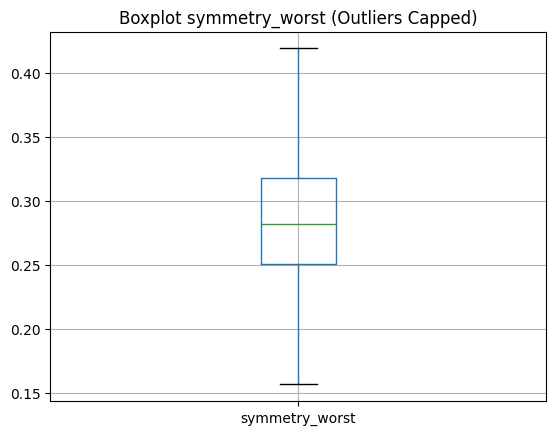

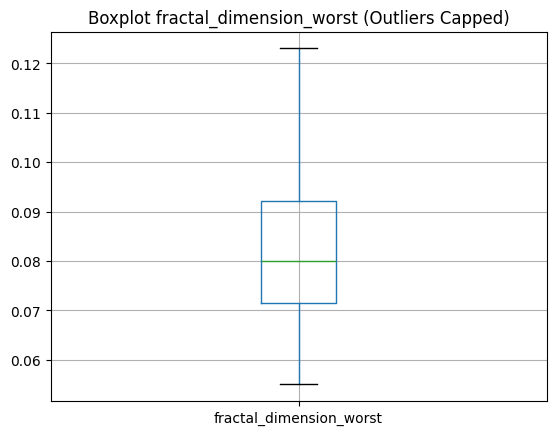

In [12]:
for col in df_clean.select_dtypes(include=np.number).columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

# Menampilkan Boxplot seteleh menghapus outliers
for col in df_clean.select_dtypes(include=np.number).columns:
  df_clean.boxplot(column=[col])
  plt.title(f"Boxplot {col} (Outliers Capped)")
  plt.show()

In [13]:
# Menampilkan Statistik Deskriptif
df_clean.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.062916,19.254736,91.543787,639.765202,0.096266,0.103222,0.086937,0.048552,0.180734,...,16.183882,25.648453,106.705369,849.907821,0.132209,0.249883,0.268754,0.114606,0.287616,0.083342
std,0.483918,3.340025,4.187510,23.047218,305.343508,0.013685,0.049386,0.073900,0.037633,0.026067,...,4.587249,6.054406,31.957777,475.645240,0.022320,0.142851,0.197461,0.065732,0.053868,0.015993
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.057975,0.019380,0.000000,0.000000,0.111200,...,7.930000,12.020000,50.410000,185.200000,0.072500,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.291000,0.419150,0.123010


In [14]:
# Menampilkan valuescounts
for col in df_clean.select_dtypes(include=np.number).columns:
  print(f"Values counts of {col}")
  print(df_clean[col].value_counts())


Values counts of diagnosis
diagnosis
0.0    357
1.0    212
Name: count, dtype: int64
Values counts of radius_mean
radius_mean
21.900    14
12.340     4
11.060     3
13.050     3
11.710     3
          ..
14.050     1
11.200     1
7.691      1
14.470     1
14.740     1
Name: count, Length: 443, dtype: int64
Values counts of texture_mean
texture_mean
30.245    7
15.700    3
18.220    3
19.830    3
18.900    3
         ..
20.860    1
17.620    1
20.670    1
20.020    1
17.560    1
Name: count, Length: 473, dtype: int64
Values counts of perimeter_mean
perimeter_mean
147.495    13
82.610      3
134.700     3
87.760      3
61.490      2
           ..
81.150      1
60.730      1
82.020      1
94.370      1
109.700     1
Name: count, Length: 511, dtype: int64
Values counts of area_mean
area_mean
1326.3    25
512.2      3
758.6      2
1138.0     2
477.3      2
          ..
1041.0     1
317.5      1
710.6      1
402.0      1
642.7      1
Name: count, Length: 515, dtype: int64
Values counts of sm

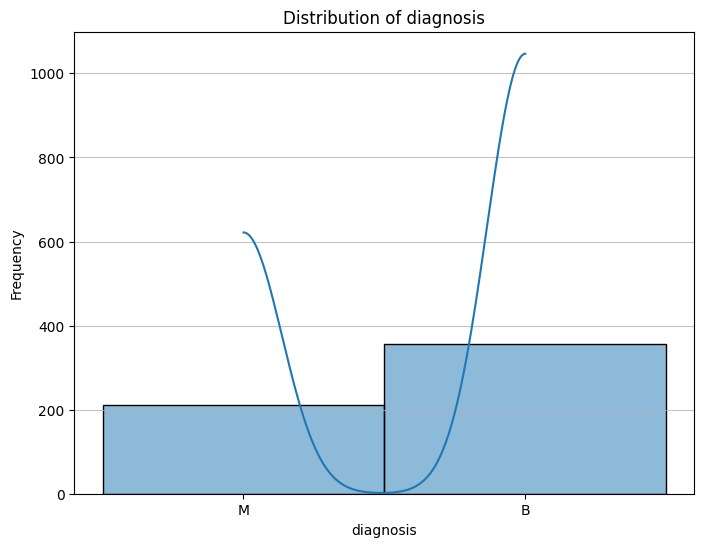

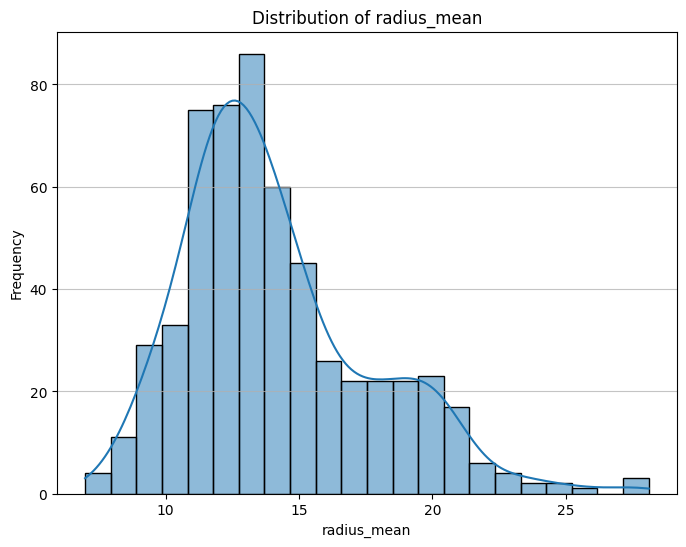

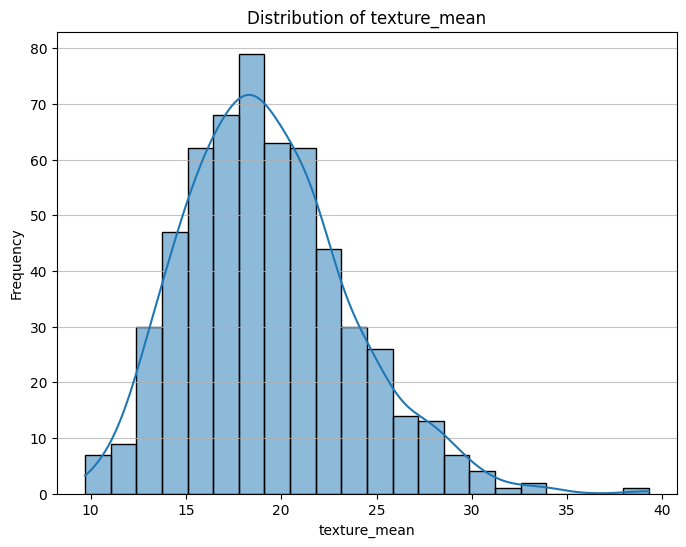

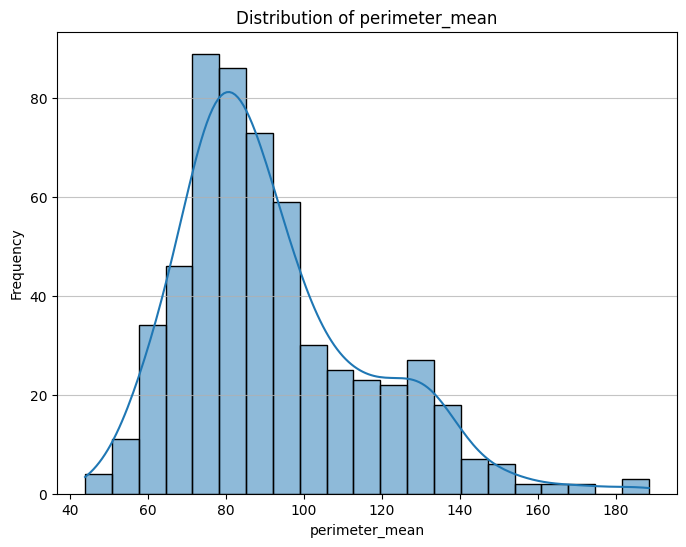

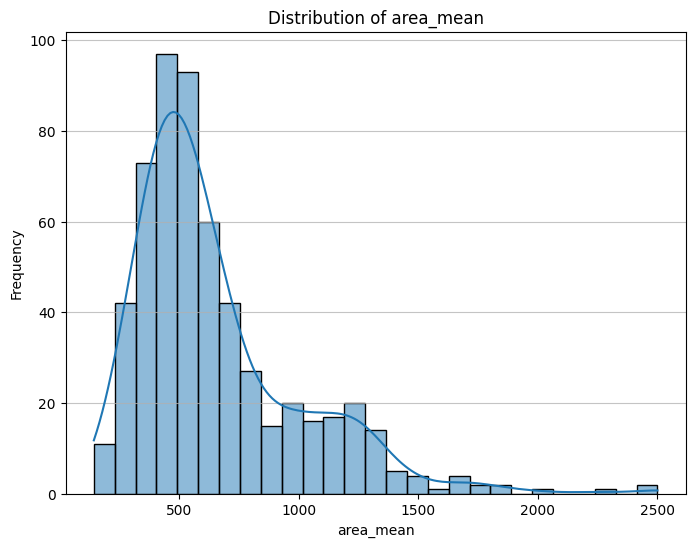

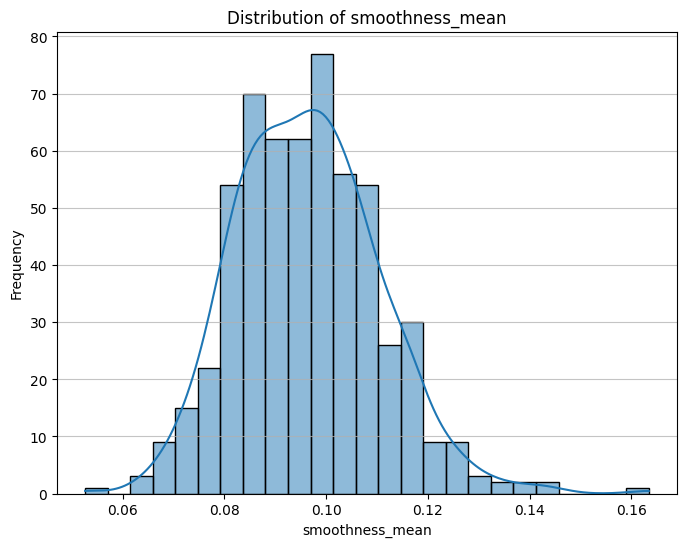

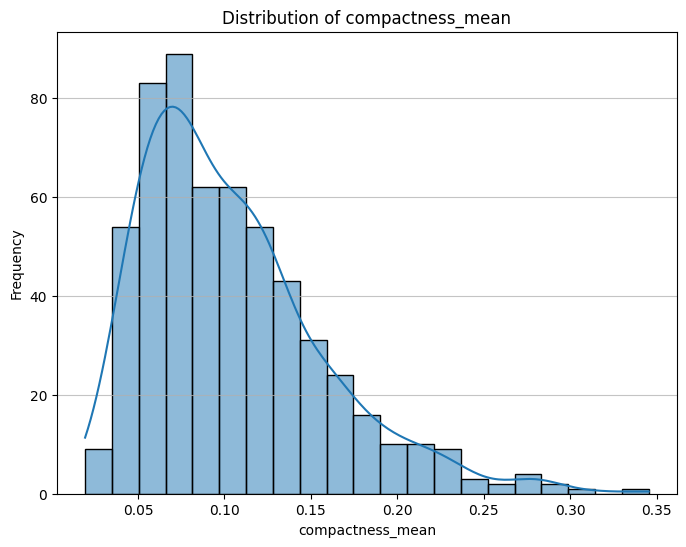

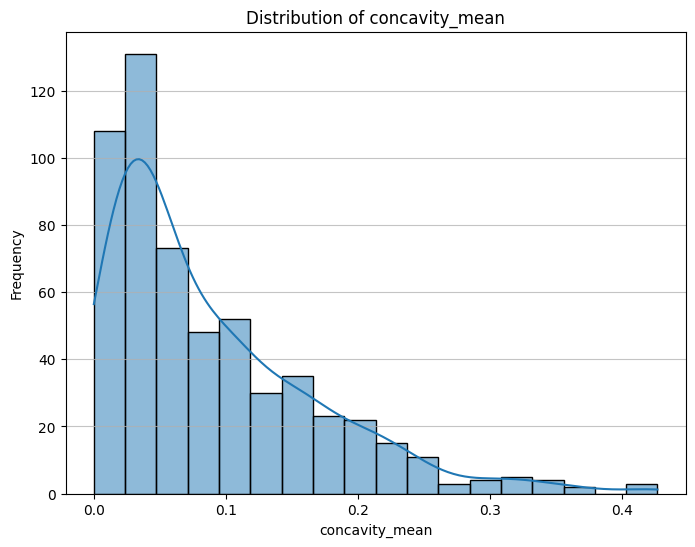

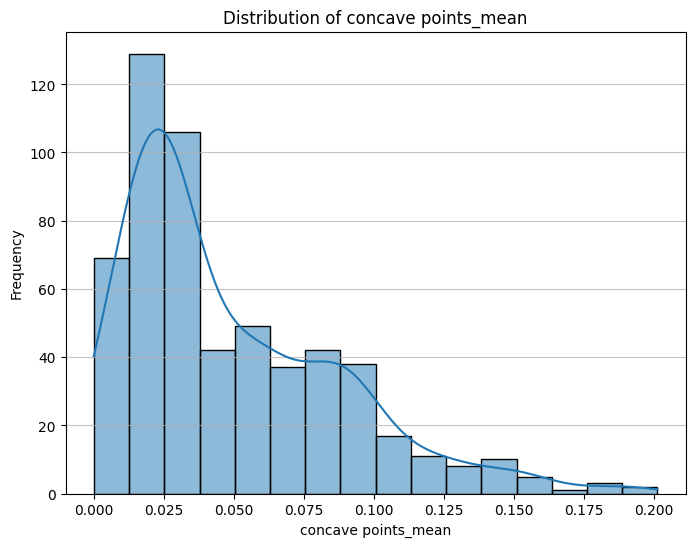

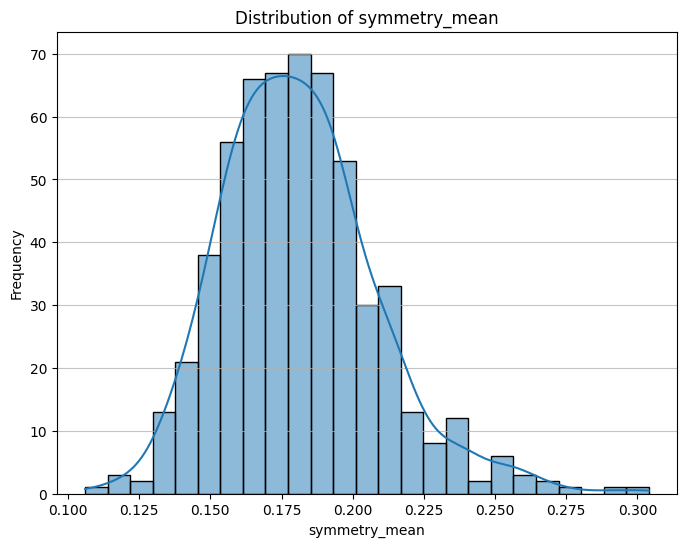

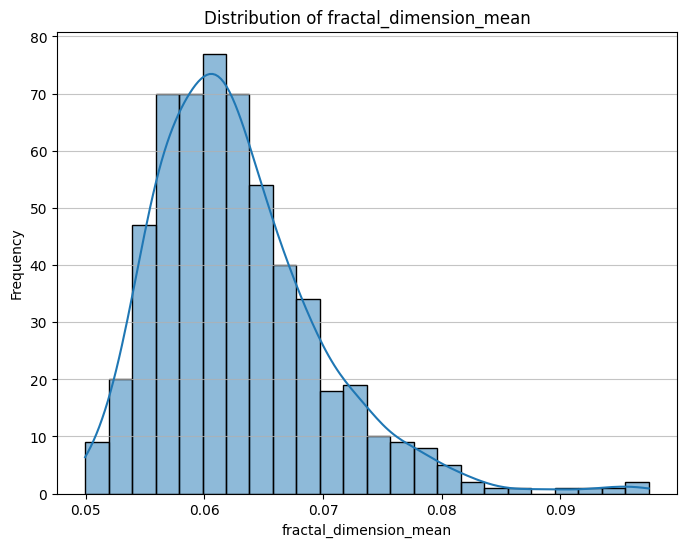

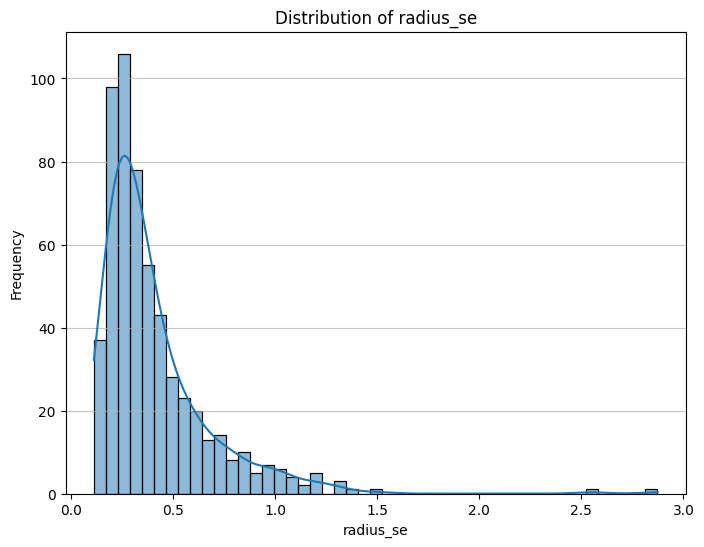

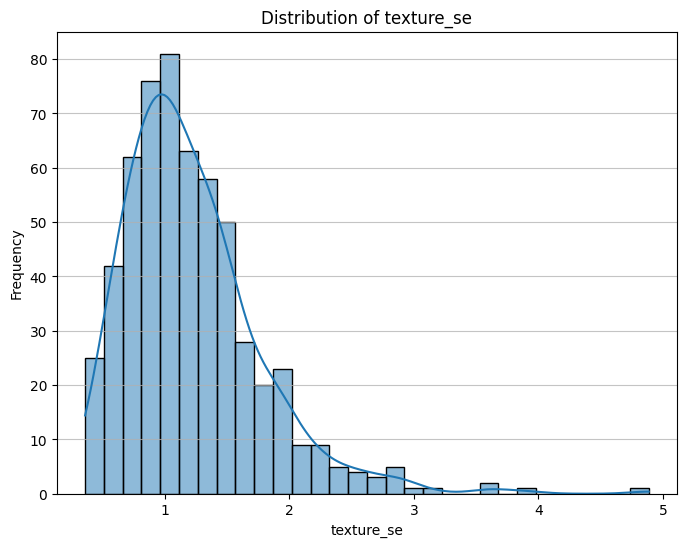

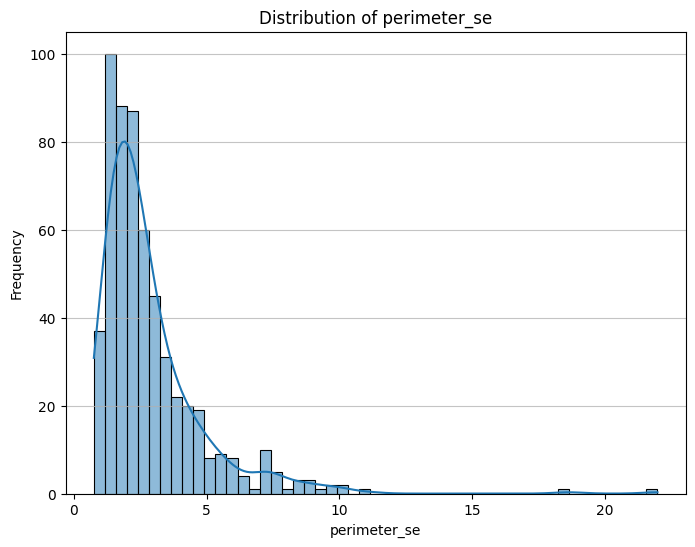

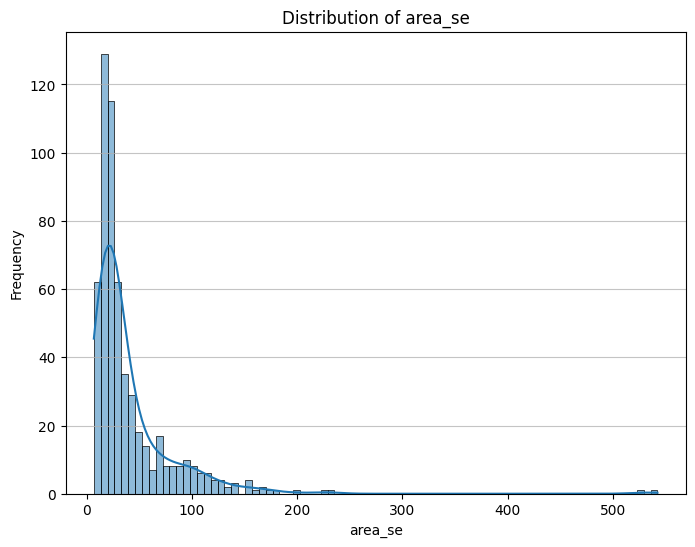

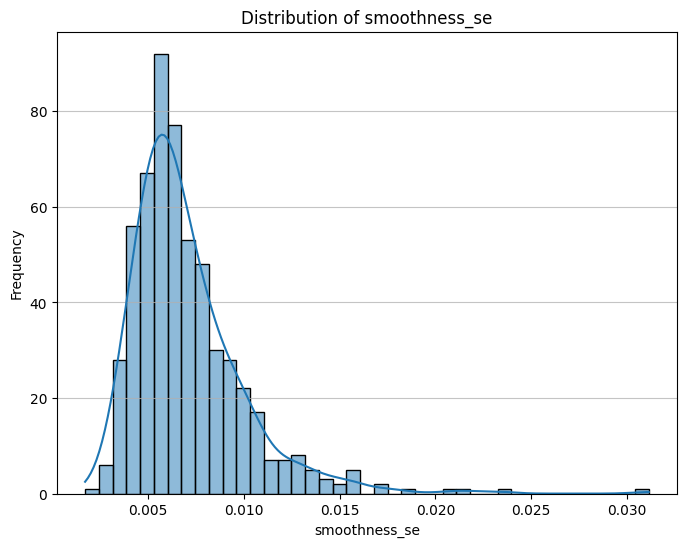

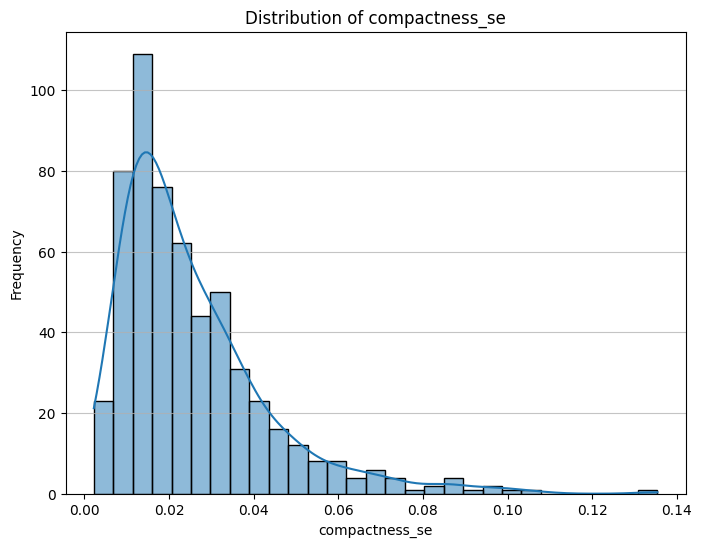

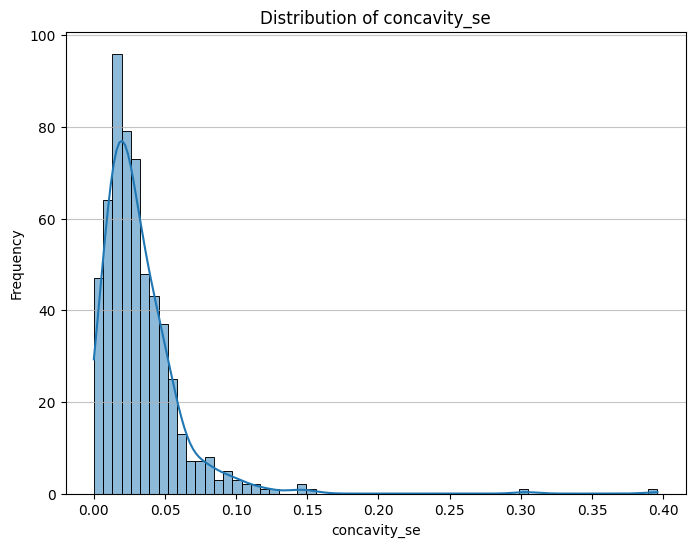

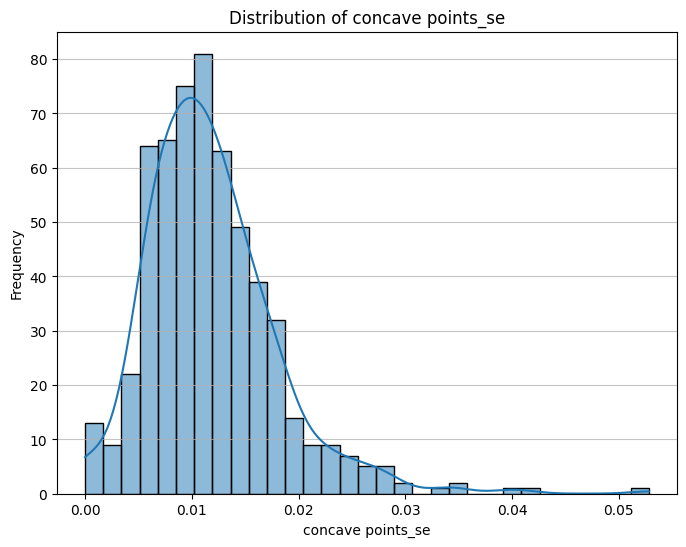

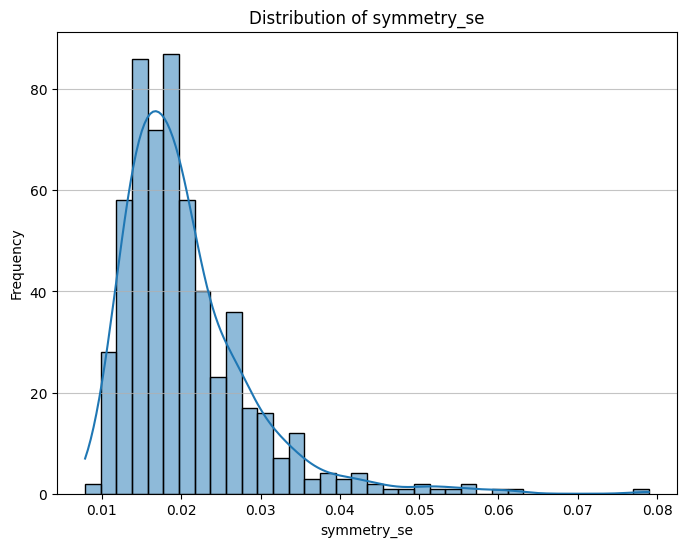

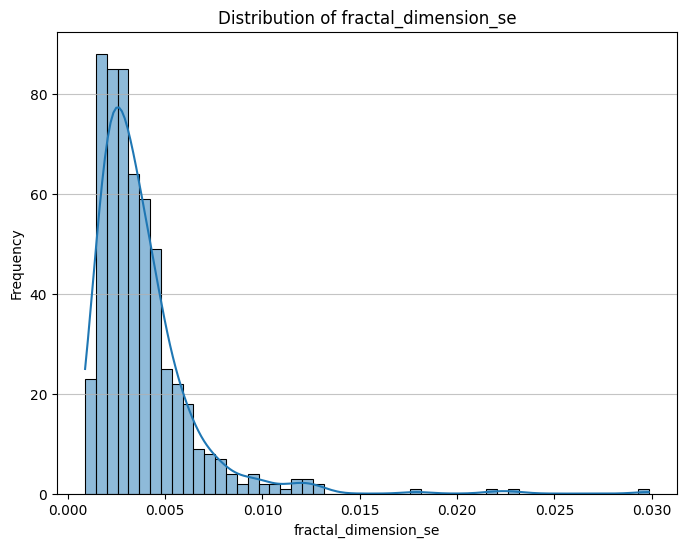

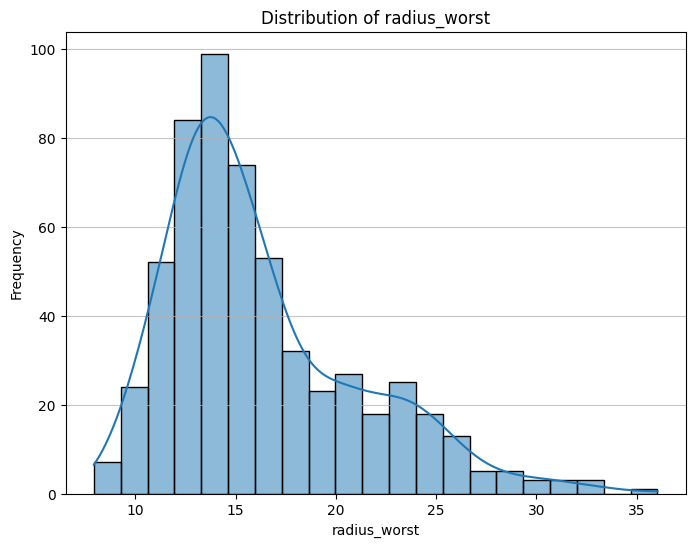

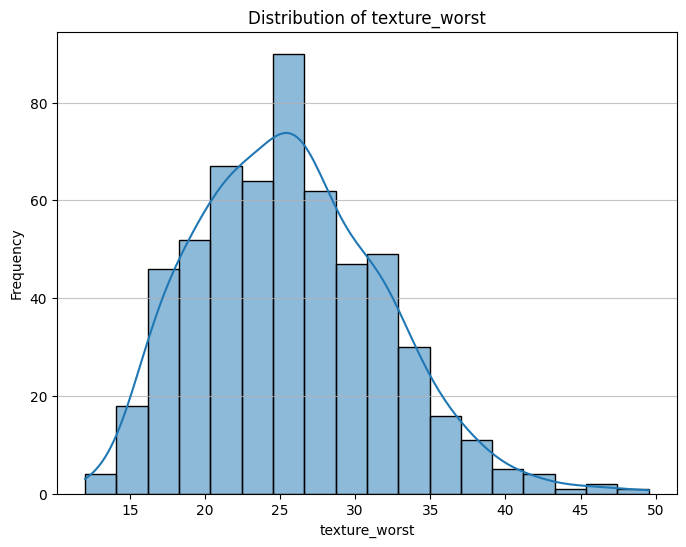

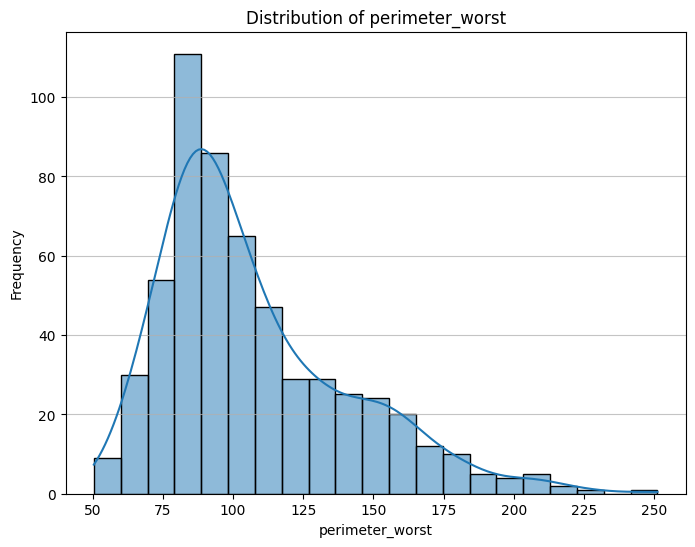

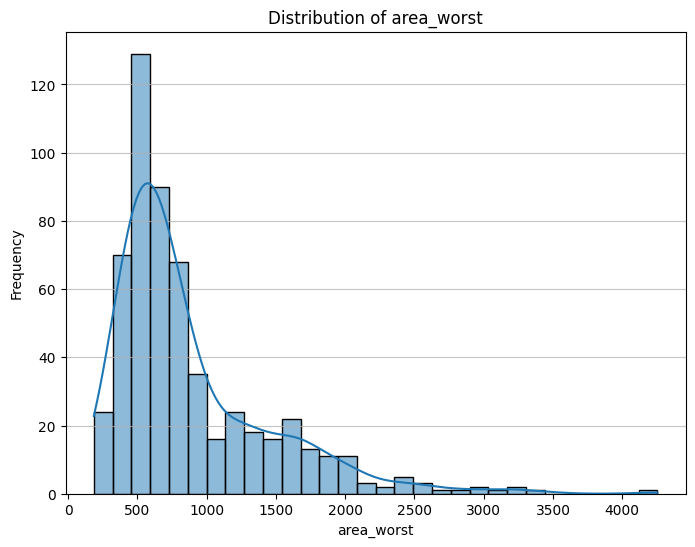

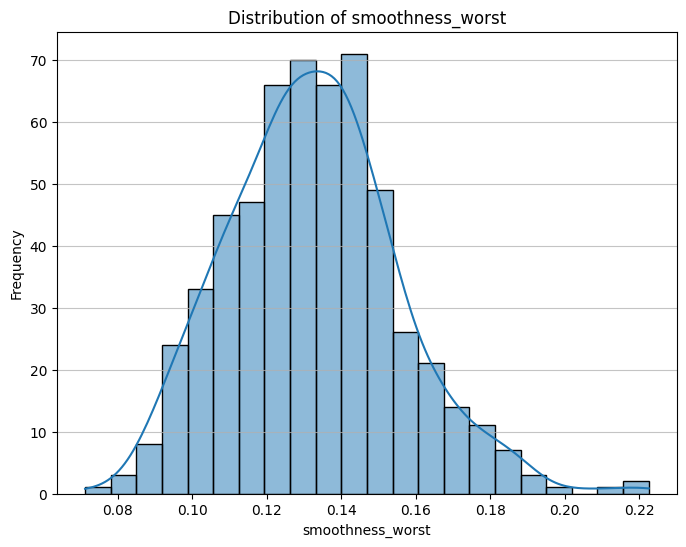

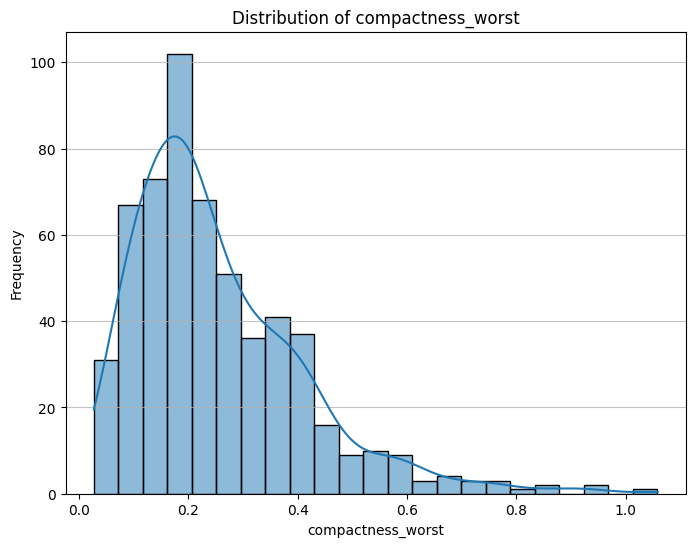

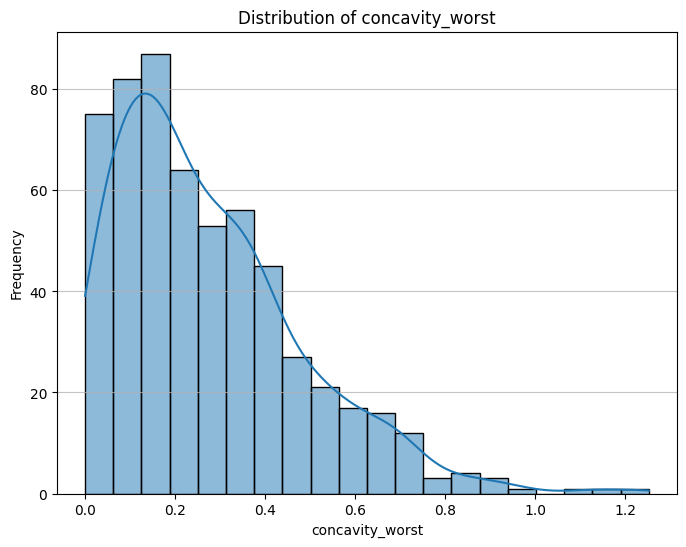

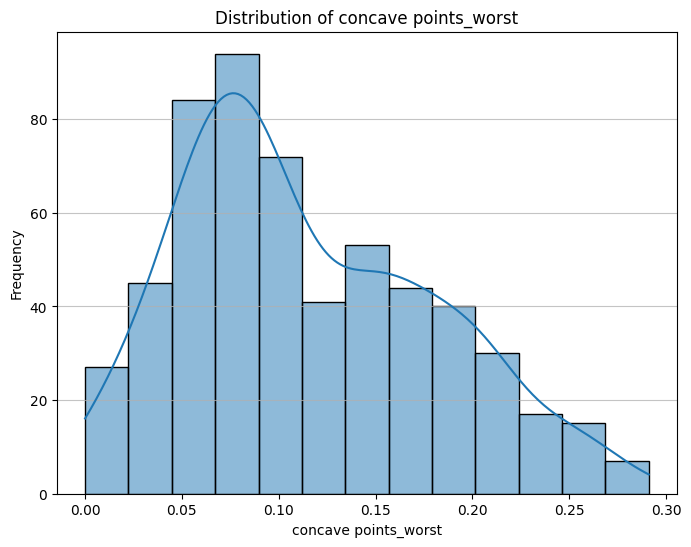

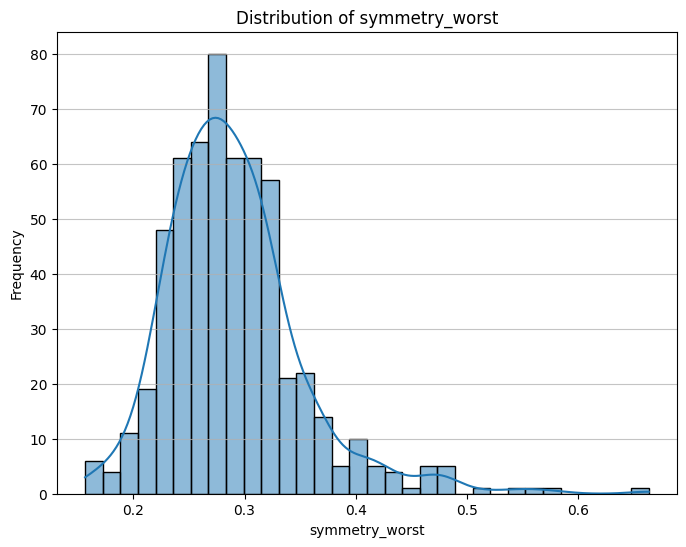

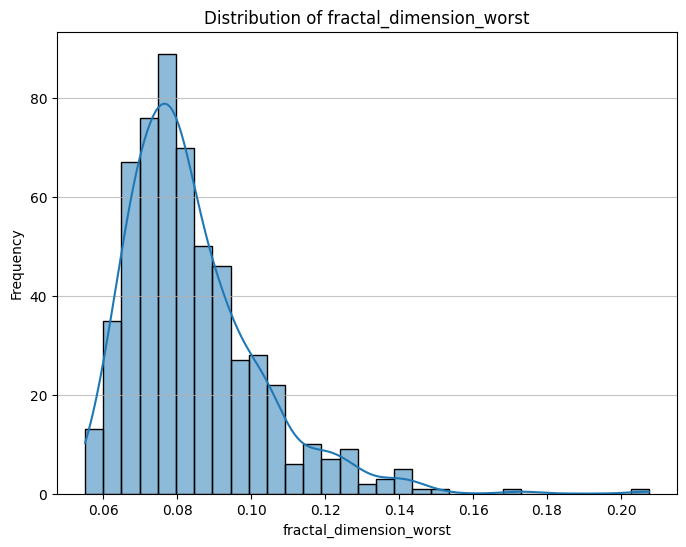

In [15]:
# Menampilkan grafik distribusi dari setiap kolom
numerical_cols = df_clean.select_dtypes(include=np.number)

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

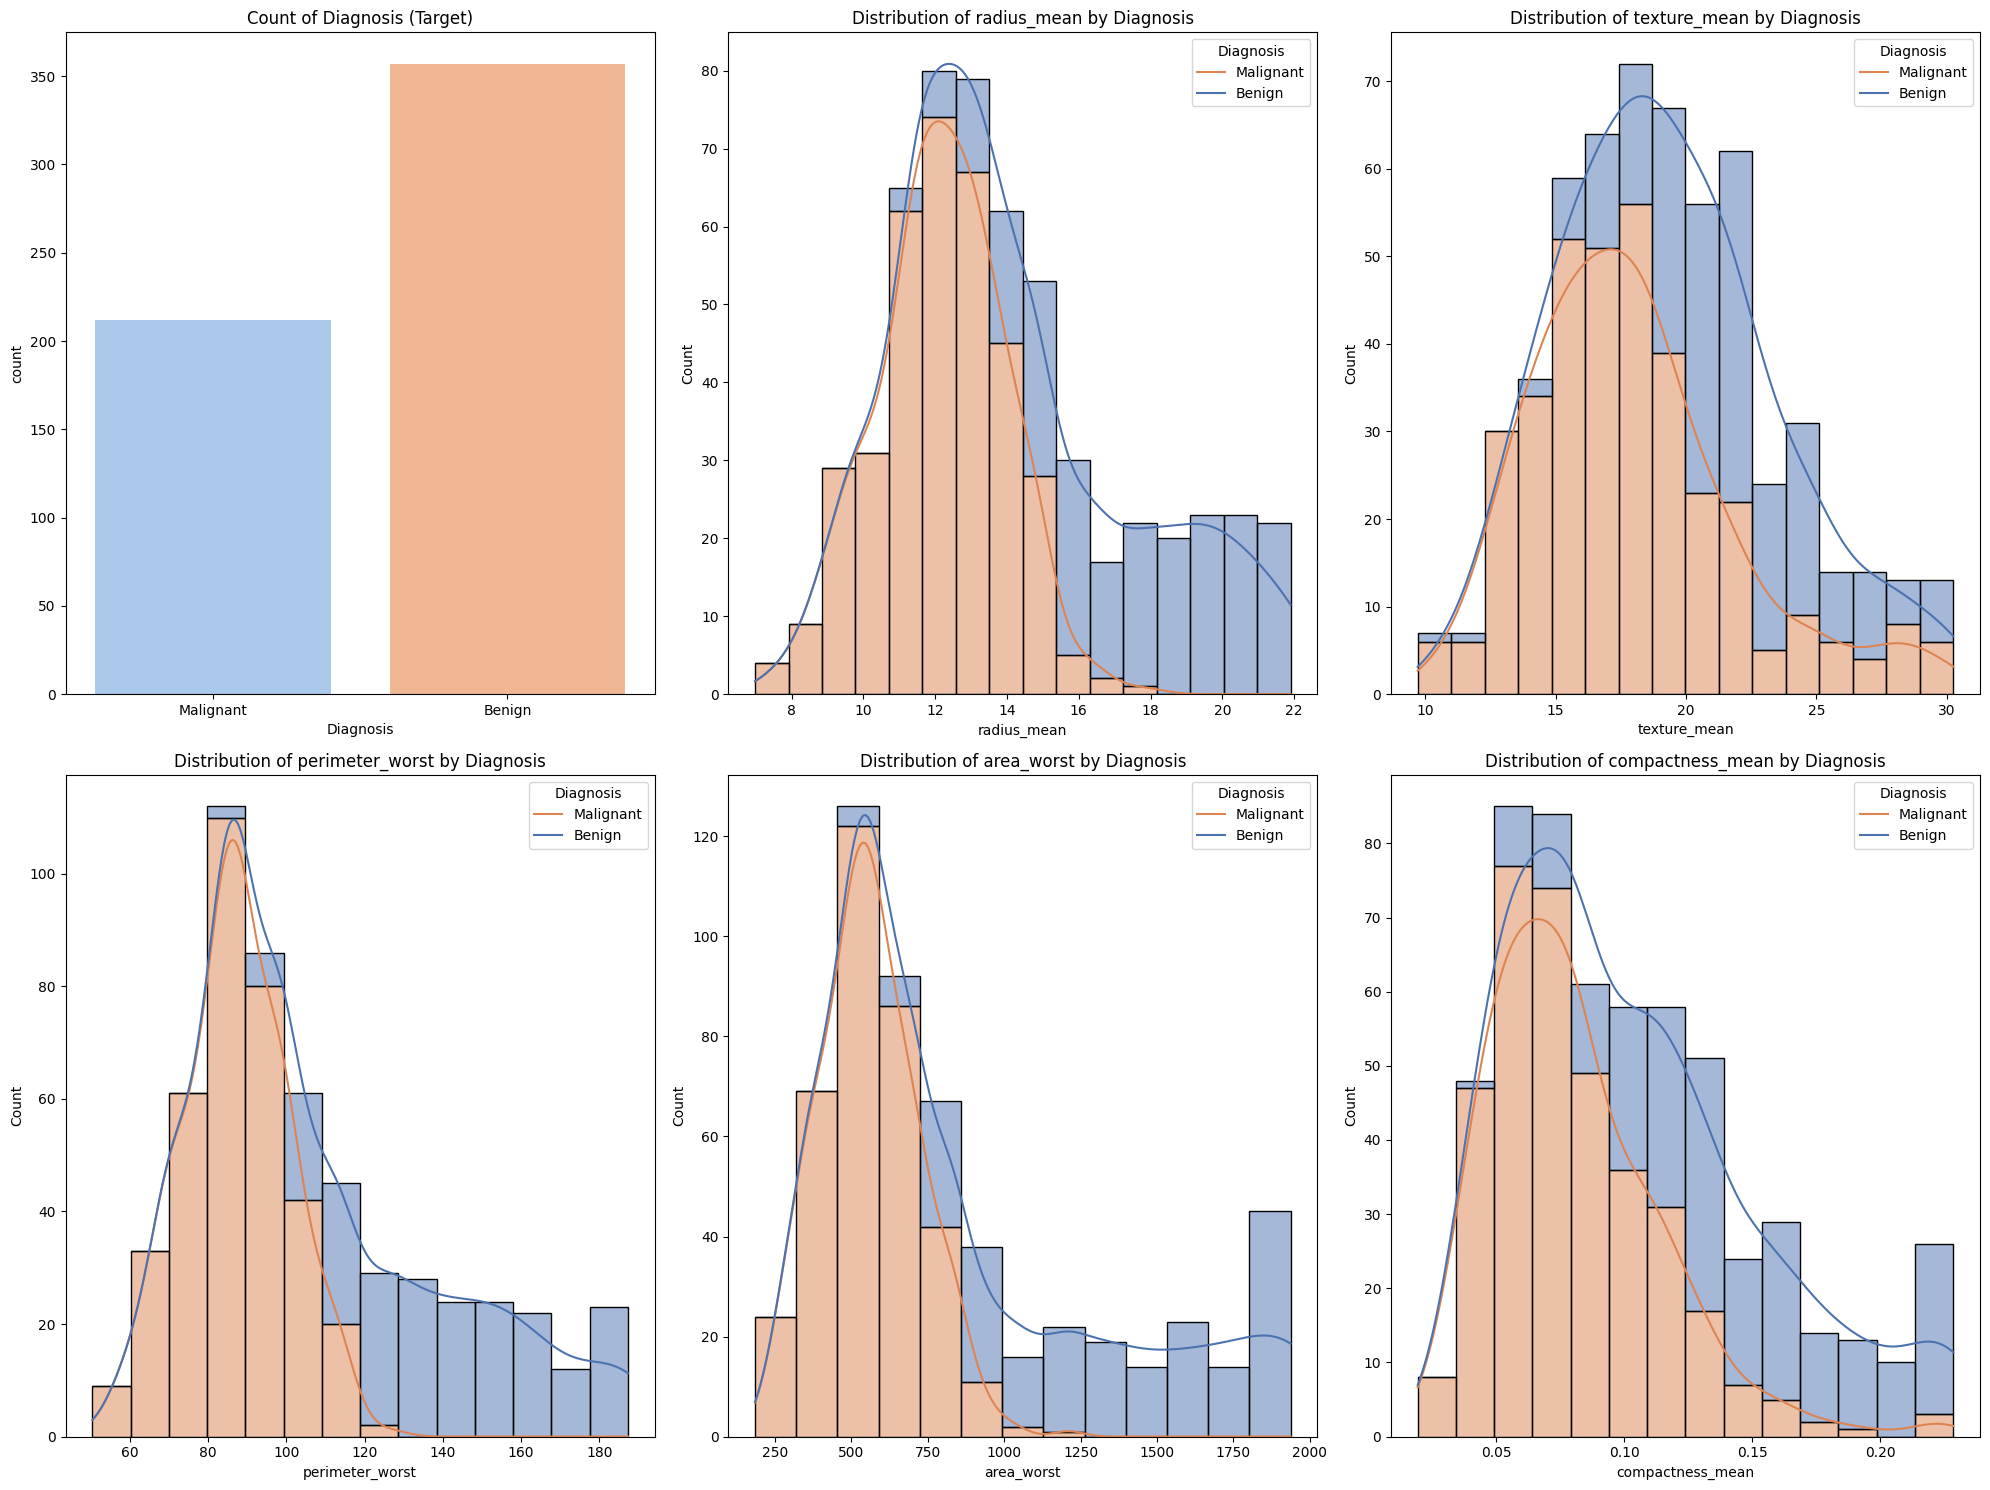

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tentukan 5 fitur numerik representatif dari Dataset Cancer dan label diagnosis untuk visualisasi
feature_cols = ['radius_mean', 'texture_mean', 'perimeter_worst', 'area_worst', 'compactness_mean']

# Buat label teks untuk diagnosis (0 dan 1) agar plot lebih mudah dibaca
df_clean['diagnosis_label'] = df_clean['diagnosis'].map({0: 'Benign', 1: 'Malignant'})


# 1. Setup Figure (2 rows, 3 columns = 6 plots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten() # Meratakan array axes 2x3 menjadi array 1D (panjang 6)

# 2. Plot 1 (axes[0]): Count of the target variable 'diagnosis'
# Menggantikan Survived dengan Diagnosis
sns.countplot(x='diagnosis_label', data=df_clean, ax=axes[0], palette='pastel', hue='diagnosis_label', legend=False)
axes[0].set_title('Count of Diagnosis (Target)')
axes[0].set_xlabel('Diagnosis')

# 3. Plot 2 hingga 6: Distribusi 5 Fitur Numerik Berdasarkan Diagnosis (Bivariate analysis)
for i, col in enumerate(feature_cols, 1):
    # Menggunakan histplot untuk data numerik, dengan 'diagnosis_label' sebagai pemisah (hue)
    sns.histplot(data=df_clean, x=col, hue='diagnosis_label', multiple='stack', kde=True, ax=axes[i], palette='deep')
    axes[i].set_title(f'Distribution of {col} by Diagnosis')
    axes[i].legend(title='Diagnosis', labels=['Malignant', 'Benign'])

# 4. Finalisasi Plot
# Hapus kolom label sementara sebelum menyimpan data
df_clean.drop(columns=['diagnosis_label'], inplace=True, errors='ignore')

plt.tight_layout()
plt.show()

In [17]:
# untuk menginspeksi data dengan cara memilih dan menampilkan baris data berdasarkan posisinya
df.iloc[0:9]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [18]:
# Asumsi 'df_clean' adalah DataFrame yang sudah dibersihkan dan 'diagnosis' sudah di-encode.

X = df_clean.drop(columns=['diagnosis'])
Y = df_clean['diagnosis']

In [19]:
# Melihat 5 baris dari kolom X
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [20]:
# Melihat 5 baris dari kolom Y
Y.head()

,diagnosis
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [21]:
# Pembagian Data (80% Training, 20% Testing) dengan stratify
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [23]:
# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [25]:
# Prediksi
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [26]:
# Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [27]:
# Menghitung Akurasi
print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  0.9362637362637363
Testing Accuracy (NB):  0.9298245614035088


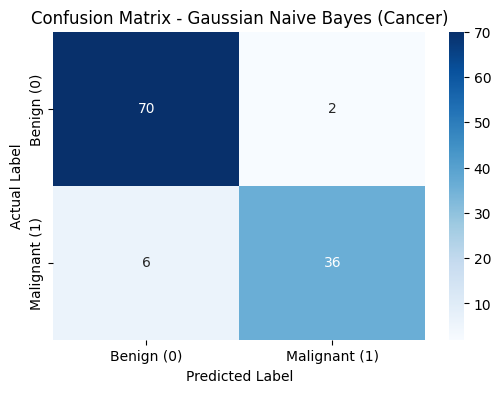

In [28]:
# Visualisasi Confusion Matrix
cm_nb = confusion_matrix(Y_test, test_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title("Confusion Matrix - Gaussian Naive Bayes (Cancer)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig("confusion_matrix_cancer_final.png")

In [29]:
# Classification Report
print("\n=== CLASSIFICATION REPORT (NB) ===")
print(classification_report(Y_test, test_pred_nb, target_names=['Benign (0)', 'Malignant (1)']))


=== CLASSIFICATION REPORT (NB) ===
               precision    recall  f1-score   support

   Benign (0)       0.92      0.97      0.95        72
Malignant (1)       0.95      0.86      0.90        42

     accuracy                           0.93       114
    macro avg       0.93      0.91      0.92       114
 weighted avg       0.93      0.93      0.93       114



In [30]:
# Melakukan 5-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')

print("\n=== CROSS VALIDATION (5-FOLD) ===")
print(f"Scores: {cv_nb}")
print(f"Mean Accuracy: {cv_nb.mean():.4f}")
print(f"Std Deviation: {cv_nb.std():.4f}")


=== CROSS VALIDATION (5-FOLD) ===
Scores: [0.92982456 0.9122807  0.96491228 0.94736842 0.94690265]
Mean Accuracy: 0.9403
Std Deviation: 0.0179
